# <b><u>MINI PROJECT </u> :
##<i> Vizulization of The Adult Income Dataset</b></i>


### <b> DESCRIPTION OF DATA-SET : </b>

Title of dataset:<b> adult.csv </b>

<b>Sources:</b>

* Original owners of database - **US Census Bureau**
* Donor of database - **Ronny Kohavi and Barry Becker**
* Date received - **05/19/96** 

<b>Number of Instances</b>

* **48842** instances, mix of continuous and discrete (**train=32561, test=16281**)
* **45222** if instances with unknown values are removed (**train=30162, test=15060**)
* Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).

<b>Number of Attributes/Fearures/Columns</b>

* 6 continuous, 8 nominal attributes. 

<b>Attribute Information/Fearures/Columns</b>

* Input variables are a mixture of numerical and categorical or ordinal data types, where the non-numerical columns are represented using strings.
* *age*: continuous.
* *workclass*: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* *fnlwgt*: continuous.(not important)
* *education*: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* *education-num*: continuous.
* *marital-status*: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* *occupation*: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* *relationship*: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* *race*: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* *gende*r: Female, Male.
* *capital-gain*: continuous.
* *capital-loss*: continuous.
* *hours-per-week*: continuous.
* *native-country*: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* *income*:There are two class values of income ‘>50K‘ and ‘<=50K‘.This is the target variable and it is represented using strings
    
<b>Missing Values:</b>

* **7%** rows have missing values. 
* The dataset contains missing values that are marked with a question mark character (?).
 

### Objective :


##### <u>Given:</u>
* age
* workclass
* education
* marital-status
* occupation
* relationship
* race
* sex
* capital-gain
* capital-loss
* hours-per-week
* native country

##### <u>Predict that:</u>
* According to the given attributes such as: hours-per-week,race,sex etc. we have to predict that what should be the "INCOME" of any candidate.

##<b> <u>1. STATISTICS ANALYSIS OF DATA SET :</u></b>

In [0]:
# Importing the required libraries :

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
#Loading the CSV file :
# here we have missing values in in form of '?'. so we have to convert these ? into NaN

missing_values=['?']

df=pd.read_csv('adult.csv',na_values=missing_values)



In [65]:
#Display the data set :

df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [66]:
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


<b> OBSERVATION 1.1 : </b>It displays the top 5 rows and bottom 5 rows of the data set of the DataFrame.

In [67]:
print("Number of total rows present in the data set--->",df.shape[0])
print("Number of total columns present in the data set--->",df.shape[1])

Number of total rows present in the data set---> 48842
Number of total columns present in the data set---> 15


<b> OBSERVATION 1.2 : </b>It displays the total no. of rows & columns of the DataFrame.

In [68]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


<b> OBSERVATION 1.3 : </b>Shows the statistic analysis of all "numerical columns" of DataFrame by default. such as : Mean.median,25,50,75 percenntile,max no. of the column,min number of the column,standard deviation and count.

In [69]:
df.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


<b> OBSERVATION 1.4 : </b>Shows the statistic analysis of all "object columns" of DataFrame. such as : count,unique values inn column,mode(top) of column,frequency of mode.

In [70]:
df.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,46043,4.884200e+04,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


<b> OBSERVATION 1.5: </b>
* Shows the statistic analysis of all columns both "numerical and object" together of the DataFrame .
* In all columns almost mean and median are same.
* most of the people work in private sector and the income most people is less than 50K.
* the most common occupation is : prof-specialty.
* most of people are from "United-states".
* male is more than female in count.

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


<b> OBSERVATION 1.6: </b>
* Print a concise summary of a DataFrame.
* This method prints information about a DataFrame including the index dtype and column dtypes, non-null values i.e. missing values and memory usage.



##<b> <u>2. HANDLING MISSING VALUES :</u></b>

In [72]:
print("Column wise sum of missing values :\n")
print(df.isnull().sum())
print("\nTotal missing values in whole Dataframe :",df.isnull().sum().sum())

Column wise sum of missing values :

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

Total missing values in whole Dataframe : 6465


<b>OBSERVATION 2.1:</b> This shows the sum of all missing values.We have missing values only in column 'Workclass','Occupation','Native-country'.

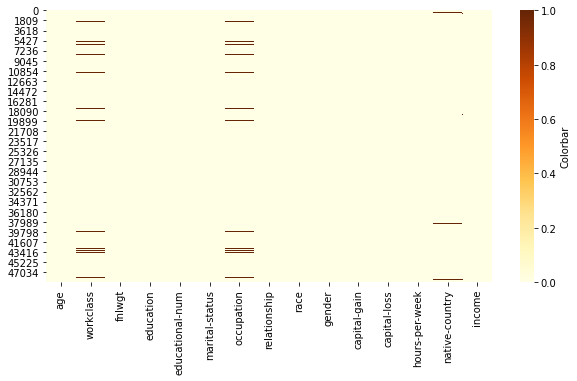

In [73]:
# Pattern of missig values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cbar=True,cmap="YlOrBr",cbar_kws={'label': 'Colorbar'})

<b>OBSERVATION 2.2: </b>
* In this pattern Y axis represents "Rows of DataFrame" and X axis represents "Columns of DataFrame".
* we can see clearly that only Workclass,Occupation and Native-country have missing values in their columns.
* Here, barlines shows the density of missing values.
* The colorbar represents that yellow color is for low density whereas brown color denotes high density of missing values.
* native-country column has less missing values as compare to workclass and occupation column.
* we can see there is almost similar row values has missing values in col:workclass and native-country.

In [74]:
print("No. of rows in dataframe :",df.shape[0])
data=df.dropna(axis = 0, how ='any')
print("No. of rows after deleting the rows containing missing values :",data.shape[0])
print("Column number are same as :",df.shape[1])

No. of rows in dataframe : 48842
No. of rows after deleting the rows containing missing values : 45222
Column number are same as : 15


<b>OBSERVATION 2.3: </b>
* 3720 rows having missing values get removed from the dataframe.
* The number of rows became 45222 from 48842.

In [75]:
print("Any missing values inside DataFrame ?",data.isnull().values.any())

Any missing values inside DataFrame ? False


In [76]:
print("Column wise sum of missing values :\n")
print(data.isnull().sum())
print("\nTotal missing values in whole Dataframe :",data.isnull().sum().sum())

Column wise sum of missing values :

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Total missing values in whole Dataframe : 0


<b>OBSERVATION 2.4 :</b>This shows, now DataFrame is free from all missing values.

In [77]:
data.drop('fnlwgt', axis = 1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [78]:
data.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [79]:
print("number of columns in old dataframe :",df.shape[1])
print("number of columns in new dataframe :",data.shape[1])

number of columns in old dataframe : 15
number of columns in new dataframe : 14


<b>OBSERVATION 2.5 :</b> We have removed the "fnlwgt" column because it doesn't contain any importan information.

In [80]:
print("percentage of lost rows are :",round(100*((len(df.index)-len(data.index))/len(df.index)),2),"%") 

# here df is the old dataframe where we have 48842 rows with missing values .
# data is the new dataframe where we have 45222 rows without any missing value.

percentage of lost rows are : 7.41 %


<b>OBSERVATION 2.6 :</b> 
* It shows the percentage of row that we have lost from data frame while removing the missing data for better performance.
* % of missing values is almost same as the % of lost rows from dataframe.

## <b><u>3. UNIVARIATE ANALYSIS :</u></b>

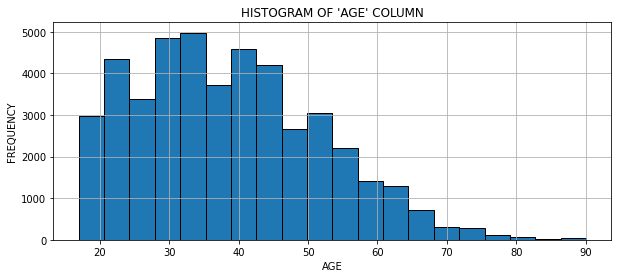

In [81]:
# AGE COLUMN --->

# 1 Histogram :
data[['age']].hist(figsize=(10,4),bins=20,edgecolor='black')
plt.xlabel("AGE")
plt.ylabel("FREQUENCY")
plt.title("HISTOGRAM OF 'AGE' COLUMN")
plt.show()

<b>OBSERVATION 3.1:</b> 
* Histogram is left skewed and having the values mostly fall between 20-60 years.
* Highest frequency of Age is almost 5000 betweeen 30-40 years.

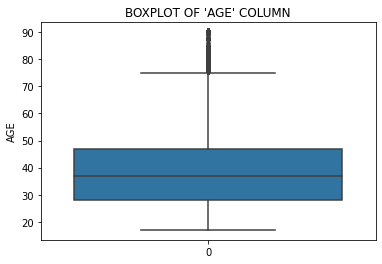

In [82]:
# 2 Boxplot :
sns.boxplot(data=data['age'])
plt.ylabel("AGE")
plt.title("BOXPLOT OF 'AGE' COLUMN")
plt.show()

<b>OBSERVATION 3.2:</b>
* median(50%) is around 37 years.
* there are so many outliars(large values) present in this column.Outliers here are defined as observations that fall above 75 years.
* the 25% is about 28 & 75% is around 48
* IQR (spread) = (48-28) =20
* Range = (90-17) =73

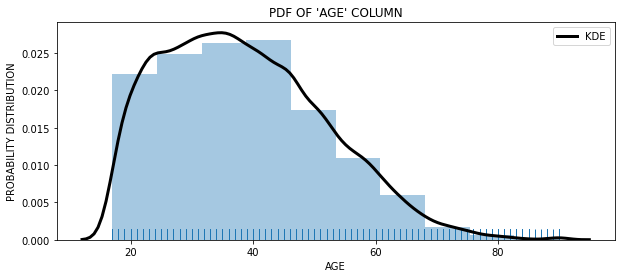

In [83]:
# 3 PDF :
plt.figure(figsize=(10,4))
sns.distplot(data['age'],bins=10,rug=True,kde_kws={"color": "k", "lw": 3, "label": "KDE"})
plt.xlabel("AGE")
plt.ylabel("PROBABILITY DISTRIBUTION")
plt.title("PDF OF 'AGE' COLUMN")
plt.show()

<b>OBSERVATION 3.3:</b>
* it's kurtosis is 0.
* the PDF is left prominent gaussian distribution that denotes that it is negatively skewed.it is not the symmetric distribution.
* It gives a much more accurate idea of the shape of the data distribution.
* The highest frequency distribution is more than 0.025.

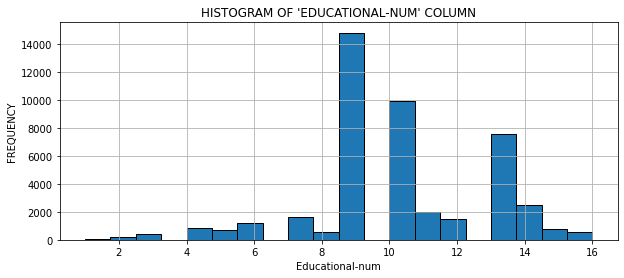

In [84]:
# EDUCATION-NUM COLUMN --->

# 1 Histogram :
data[['educational-num']].hist(figsize=(10,4),bins=20,edgecolor='black')
plt.xlabel("Educational-num")
plt.ylabel("FREQUENCY")
plt.title("HISTOGRAM OF 'EDUCATIONAL-NUM' COLUMN")
plt.show()

<b>OBSERVATION 3.4:</b> 
* This shows the fall is in discrete form.Highest candidates having the education between 8-10 class.
* the highest frequency of educational-num is more than 14000 between 8th - 10th class.

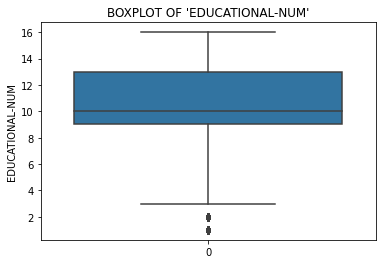

In [85]:
# 2 Boxplot :
sns.boxplot(data=data['educational-num'])
plt.ylabel("EDUCATIONAL-NUM")
plt.title("BOXPLOT OF 'EDUCATIONAL-NUM'")
plt.show()

<b>OBSERVATION 3.5:</b>
* the median is around 10.
* there are small values of outliars can be seen.Outliers here are defined as observations that fall below 3rd class.
* IQR (spread)= (12-9) =2
* Range = (60-17) = 59

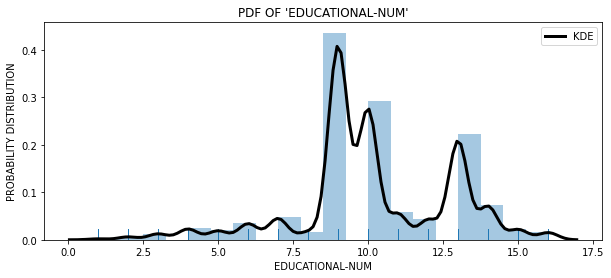

In [86]:
# 3 PDF :
plt.figure(figsize=(10,4))
sns.distplot(data['educational-num'],bins=20,rug=True,kde_kws={"color": "k", "lw": 3, "label": "KDE"})
plt.xlabel("EDUCATIONAL-NUM")
plt.ylabel("PROBABILITY DISTRIBUTION")
plt.title("PDF OF 'EDUCATIONAL-NUM'")
plt.show()

<b>OBSERVATION 3.6:</b>
* it is not a Gussian normal probability distribution because its kurtosis is positive(not 0).
* it shows the PD but the peak values is between 7.5-10.0.
* It gives a much more accurate idea of the shape of the data distribution as the data has more variance.
* the prob.distribution of highest peak is 0.4.

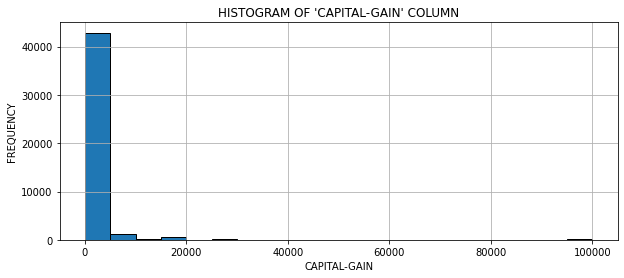

In [87]:
# CAPITAL-GAIN COLUMN --->

# 1 Histogram :
data[['capital-gain']].hist(figsize=(10,4),bins=20,edgecolor='black')
plt.xlabel("CAPITAL-GAIN")
plt.ylabel("FREQUENCY")
plt.title("HISTOGRAM OF 'CAPITAL-GAIN' COLUMN")
plt.show()

<b>OBSERVATION 3.7:</b>
*  we can simply say the highest fall is between 0-10000.there are some outliars also.
* the highest frequency of Capital-gain is 40000 between 0-500 $.

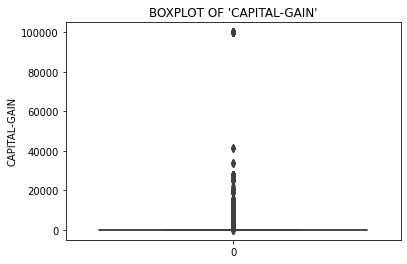

In [88]:
# 2 Boxplot :
sns.boxplot(data=data['capital-gain'])
plt.ylabel("CAPITAL-GAIN")
plt.title("BOXPLOT OF 'CAPITAL-GAIN'")
plt.show()

<b>OBSERVATION 3.8:</b> 
* the median,25% and 75% are 0.
* Outliers here are defined as observations that fall above 0$.
* IQR (spread)= 0
* Range = (99999-0) = 99999

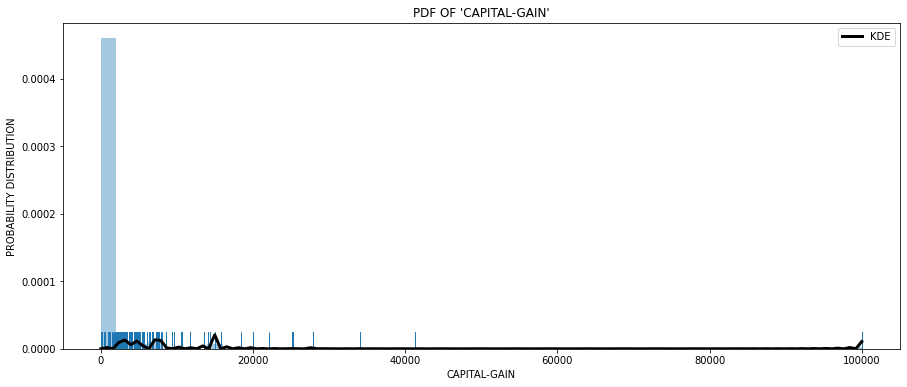

In [89]:
# 3 PDF :
plt.figure(figsize=(15,6))
sns.distplot(data['capital-gain'],bins=50,rug=True,kde_kws={"color": "k", "lw": 3, "label": "KDE"})
plt.xlabel("CAPITAL-GAIN")
plt.ylabel("PROBABILITY DISTRIBUTION")
plt.title("PDF OF 'CAPITAL-GAIN'")
plt.show()

<b>OBSERVATION 3.9  : </b>
* We cann't see the clear PDE because the input values are very small as we have seen above the mean and median is near about 0. 
* the peak value has the prob. dist. between 0-0.0001.

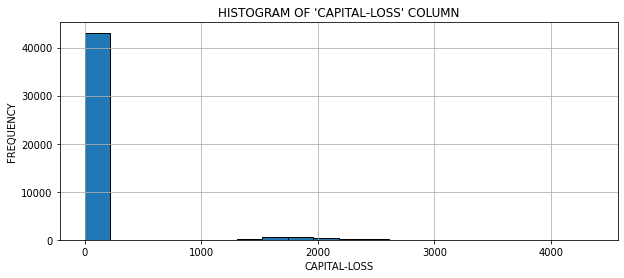

In [90]:
# CAPITAL-LOSS COLUMN --->

# 1 Histogram :
data[['capital-loss']].hist(figsize=(10,4),bins=20,edgecolor='black')
plt.xlabel("CAPITAL-LOSS")
plt.ylabel("FREQUENCY")
plt.title("HISTOGRAM OF 'CAPITAL-LOSS' COLUMN")
plt.show()

<b>OBSERVATION 3.10:</b> 
* we can simply say the highest fall is between 0-200.there are some outliars also.
* the histogram is highly left-skewed.
* the highest frequency of capital-loss is more than 40000 between 0-250 $.

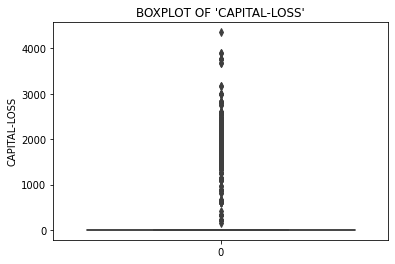

In [91]:
# 2 Boxplot :
sns.boxplot(data=data['capital-loss'])
plt.ylabel("CAPITAL-LOSS")
plt.title("BOXPLOT OF 'CAPITAL-LOSS'")
plt.show()

<b>OBSERVATION 3.11:</b> 
* the median,25% and 75% are 0.
* there are so many outliars.Outliers here are defined as observations that fall above 0 $.
* IQR (spread)= 0
* Range = (4356-0) = 4356

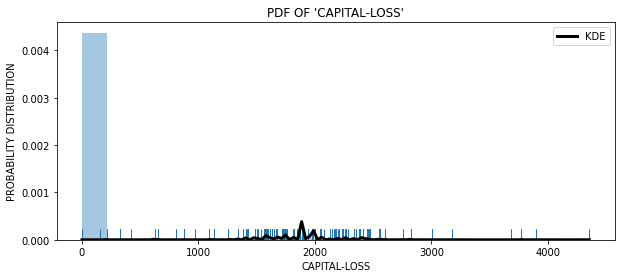

In [92]:
# 3 PDF :
plt.figure(figsize=(10,4))
sns.distplot(data['capital-loss'],bins=20,rug=True,kde_kws={"color": "k", "lw": 3, "label": "KDE"})
plt.xlabel("CAPITAL-LOSS")
plt.ylabel("PROBABILITY DISTRIBUTION")
plt.title("PDF OF 'CAPITAL-LOSS'")
plt.show()

<b>OBSERVATION 3.9  : </b> 
* We cann't see the clear PDE because the input values are very small as we have seen above the mean and median is near about 0.
* It is not a guassian distrivution because it has positive kurtosis.
* the highest peaak values has prob. dist. is between 0-0.001.

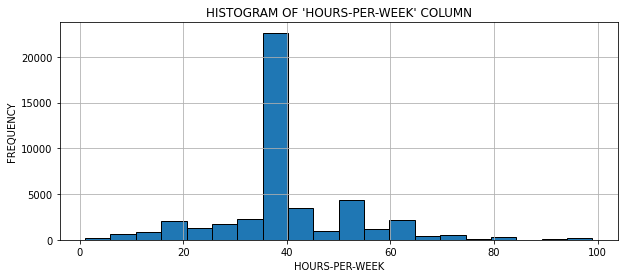

In [93]:
# HOURS-PER-WEEK COLUMN --->

# 1 Histogram :
data[['hours-per-week']].hist(figsize=(10,4),bins=20,edgecolor='black')
plt.xlabel("HOURS-PER-WEEK")
plt.ylabel("FREQUENCY")
plt.title("HISTOGRAM OF 'HOURS-PER-WEEK' COLUMN")
plt.show()

<b>OBSERVATION 3.13:</b> 
* highest fall is between 30-50 hours-per-week.Some outliars also.
* highest frequency is more 

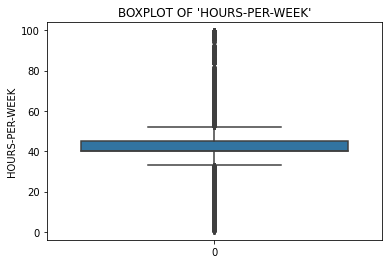

In [94]:
# 2 Boxplot :
sns.boxplot(data=data['hours-per-week'])
plt.ylabel("HOURS-PER-WEEK")
plt.title("BOXPLOT OF 'HOURS-PER-WEEK'")
plt.show()

<b>OBSERVATION 3.14:</b>
* there are so many outliars fall above 45 h-p-w and fall below 40 h-p-w.
* IQR (spread) = (45-40) = 5
* Range = (99-1) = 98

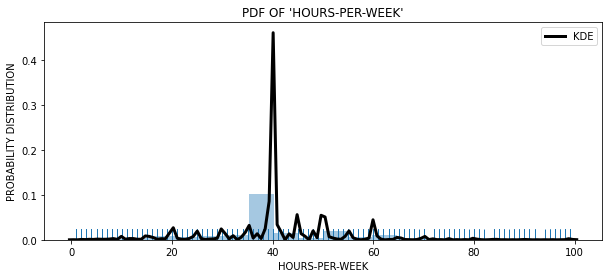

In [95]:
# 3 PDF :
plt.figure(figsize=(10,4))
sns.distplot(data['hours-per-week'],bins=20,rug=True,kde_kws={"color": "k", "lw": 3, "label": "KDE"})
plt.xlabel("HOURS-PER-WEEK")
plt.ylabel("PROBABILITY DISTRIBUTION")
plt.title("PDF OF 'HOURS-PER-WEEK'")
plt.show()

<b>OBSERVATION 3.15 :</b>  
* it is a distribution curve with positive kurtosis.
* the prob.dist. of highest peak values is more than 0.4.

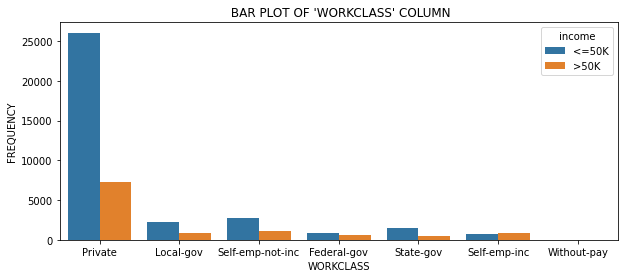

In [96]:
# WORKCLASS COLUMN --->

# 1  BAR PLOT  :
plt.figure(figsize=(10,4))
sns.countplot(x="workclass", data=data,hue='income')
plt.xlabel("WORKCLASS")
plt.ylabel("FREQUENCY")
plt.title(" BAR PLOT OF 'WORKCLASS' COLUMN")
plt.show()

<b>OBSERVATION 3.16 :</b>
* highest frequency is more than 25000 of the people who work in private sector.
* no-one is in without-pay sector.
* most people get less that 50K as compared to more than 50K income. 


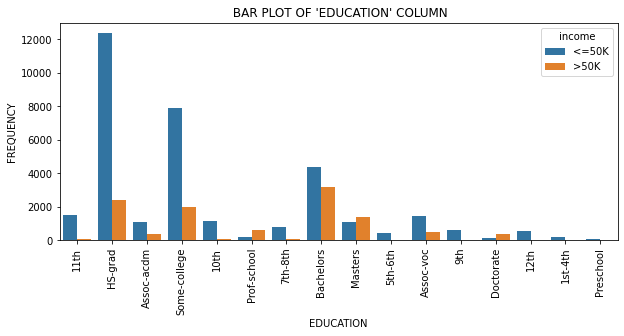

In [97]:
# EDUCATION COLUMN --->

# 1  BAR PLOT :
plt.figure(figsize=(10,4))
sns.countplot(x="education", data=data,hue='income')
plt.xlabel("EDUCATION")
plt.ylabel("FREQUENCY")
plt.title(" BAR PLOT OF 'EDUCATION' COLUMN")
plt.xticks(rotation=90)
plt.show()

<b>OBSERVATION 3.17 :</b>
* Most of the people are getting less than 50K having HS-grad education.
* people having education of 1st to 6th having only income less than 50K.
* the number of people recieving >50K income is less.
* In masters,doctarate,professors of school,having the number of people having >50K is greater than <=50K, otherwise in other education most of the people get paid <=50K.
* highest frequency of Education is 12000 having HS_GRAD.

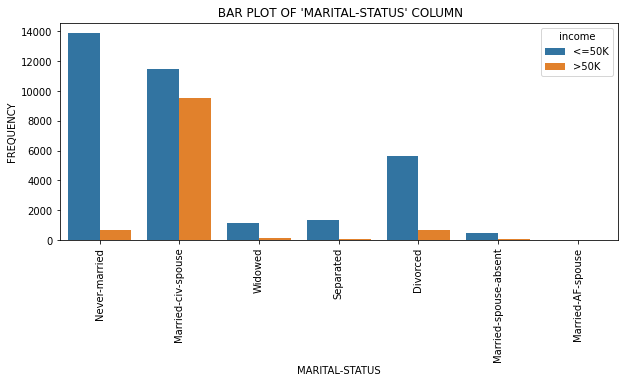

In [98]:
# MARITAL-STATUS COLUMN --->

# 1  BAR PLOT  :
plt.figure(figsize=(10,4))
sns.countplot(x="marital-status", data=data,hue='income')
plt.xlabel("MARITAL-STATUS")
plt.ylabel("FREQUENCY")
plt.title(" BAR PLOT OF 'MARITAL-STATUS' COLUMN")
plt.xticks(rotation=90)
plt.show()

<b>OBSERVATION 3.18 :</b> 
* That's interesting observation  :)  
most of the unmarried people get paid less than 50K and their number is also high.
* There is no people having the category of Married-AF-spouse.
* the highest frequency of marital-status is 14000 of never-married.


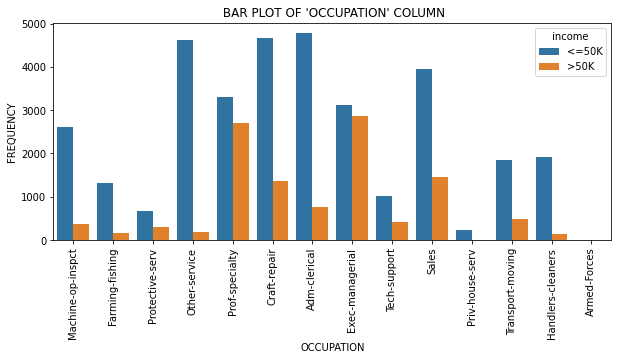

In [99]:
# OCCUPATION COLUMN --->

# 1 BAR PLOT :
plt.figure(figsize=(10,4))
sns.countplot(x="occupation", data=data,hue='income')
plt.xlabel("OCCUPATION")
plt.ylabel("FREQUENCY")
plt.title(" BAR PLOT OF 'OCCUPATION' COLUMN")
plt.xticks(rotation=90)
plt.show()

<b>OBSERVATION 3.19 :</b>
* No one works in Armed-Forces category.
* In Private-house-service people don't earn more than 50K.
* the highestcount of Occupation is 4700(approx) of Adm-clerical.


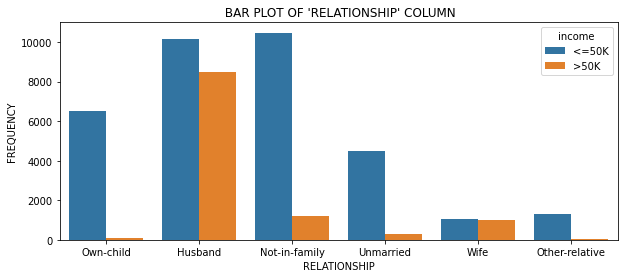

In [100]:
# RELATIONSHIP COLUMN --->

# 1  BAR PLOT  :
plt.figure(figsize=(10,4))
sns.countplot(x="relationship", data=data,hue='income')
plt.xlabel("RELATIONSHIP")
plt.ylabel("FREQUENCY")
plt.title(" BAR PLOT OF 'RELATIONSHIP' COLUMN")
plt.show()

<b>OBSERVATION 3.20 :</b>
* The number of wives are almost equal who are getting paid >50K and <=50K.
* Few people get paid more than 50K in Other-relative and having Own-child.  
* the highest count if relationship is more than 10000 of not-in-family.

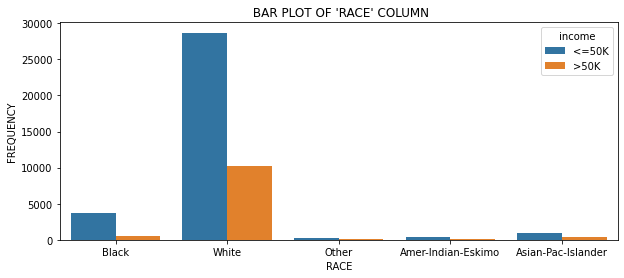

In [101]:
# RACE COLUMN --->

# 1  BAR PLOT  :
plt.figure(figsize=(10,4))
sns.countplot(x="race", data=data,hue='income')
plt.xlabel("RACE")
plt.ylabel("FREQUENCY")
plt.title(" BAR PLOT OF 'RACE' COLUMN")
plt.show()

<b>OBSERVATION 3.21 :</b>
* The number of white people is more as compared to other skin color.(May be Race discrimination).
* less people have income >50K.
* the highesst count of Race is 25800 of white.

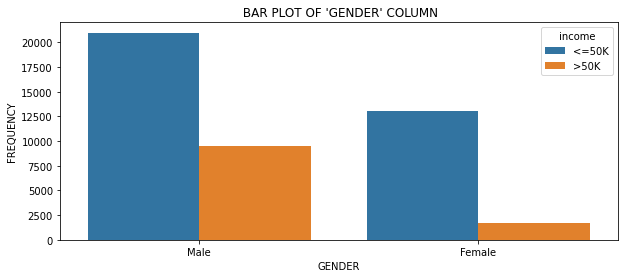

In [102]:
# GENDER COLUMN --->

# 1 BAR PLOT :
plt.figure(figsize=(10,4))
sns.countplot(x="gender", data=data,hue='income')
plt.xlabel("GENDER")
plt.ylabel("FREQUENCY")
plt.title(" BAR PLOT OF 'GENDER' COLUMN")
plt.show()

<b>OBSERVATION 3.22 :</b>
* Obviously count of males are more than females .
* males earn more than females comparatively.
* the highest frequency oof Gender is more than 20000 i.e. Male.

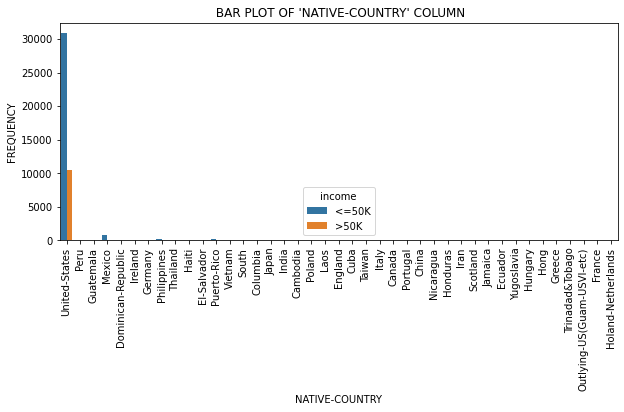

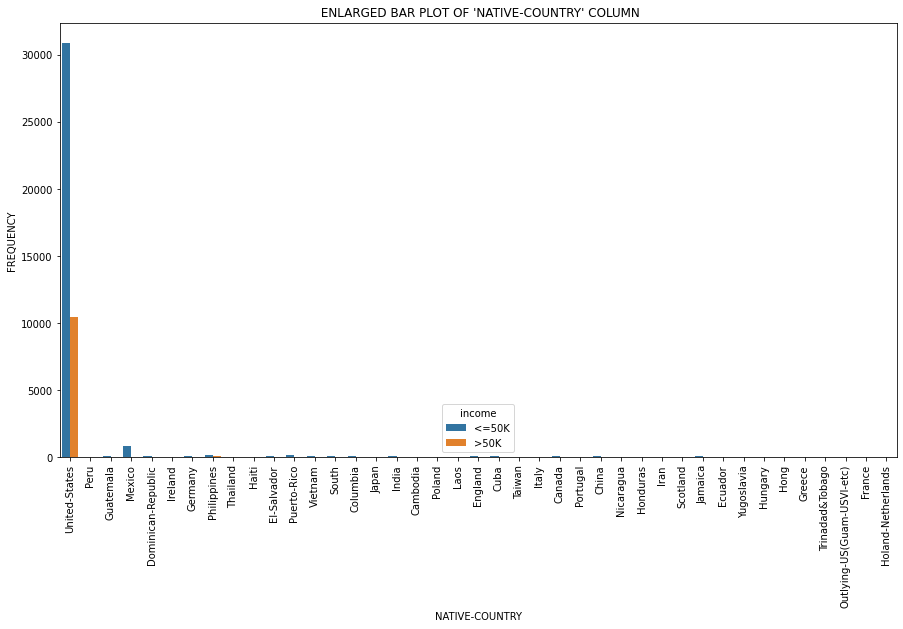

In [103]:
# NATIVE-COUNTRY COLUMN --->

# 1 BAR PLOT :
plt.figure(figsize=(10,4))
sns.countplot(x="native-country", data=data,hue='income')
plt.xlabel("NATIVE-COUNTRY")
plt.ylabel("FREQUENCY")
plt.title(" BAR PLOT OF 'NATIVE-COUNTRY' COLUMN")
plt.xticks(rotation=90)
plt.show()

# enlarging this plot :
plt.figure(figsize=(15,8))
sns.countplot(x="native-country", data=data,hue='income')
plt.xlabel("NATIVE-COUNTRY")
plt.ylabel("FREQUENCY")
plt.title(" ENLARGED BAR PLOT OF 'NATIVE-COUNTRY' COLUMN")
plt.xticks(rotation=90)
plt.show()

<b>OBSERVATION 3.23 :</b>
* the highest count of Native-country is more than 30000 nd obviously of US.

*This is amazing obervation we got :)*
* The number of people living in United-States is much higher than the number of people living in rest of the Native-states.
* there are so many countries having no candidates.
* we can also see in enlarged graph that except having US and Phillipines as native-country no one get paid greater than 50K salary.


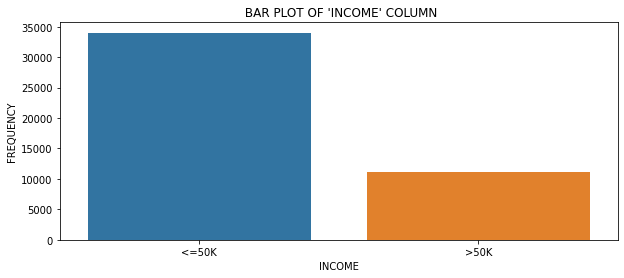

In [104]:
# INCOME COLUMN --->

# 1 BAR PLOT :
plt.figure(figsize=(10,4))
sns.countplot(x="income", data=data)
plt.xlabel("INCOME")
plt.ylabel("FREQUENCY")
plt.title(" BAR PLOT OF 'INCOME' COLUMN")
plt.show()

<b> OBSERVTION 3.24 :</b>
* As we have seen all the above obsservation we can say the number of people getting (less than 50K) is more than the number of people get paid (more than 50K).
* the highest count of Income is 34000 (approx) of people getting income less than 50K$


## <b><u>4. BIVARIATE ANALYSIS :</u></b>

In [105]:
data.cov()

,age,educational-num,capital-gain,capital-loss,hours-per-week
age,174.712093,1.269536,7.906093e+03,317.683292,16.187565
educational-num,1.269536,6.517202,2.431918e+03,84.473549,4.481768
capital-gain,7906.092955,2431.918128,5.634649e+07,-97583.839752,7560.437457
capital-loss,317.683292,84.473549,-9.758384e+04,163989.436496,263.523274
hours-per-week,16.187565,4.481768,7.560437e+03,263.523274,144.180254


<b> OBSERVATION 4.1 : </b>
* If age increases then values in all columns increases respectively.
* same as for all columns but if capital-gain increses then capital-loss decreses and vice versa.

In [106]:
data.corr()

,age,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,0.037623,0.079683,0.059351,0.101992
educational-num,0.037623,1.000000,0.126907,0.081711,0.146206
capital-gain,0.079683,0.126907,1.000000,-0.032102,0.083880
capital-loss,0.059351,0.081711,-0.032102,1.000000,0.054195
hours-per-week,0.101992,0.146206,0.083880,0.054195,1.000000


Text(0.5, 1.0, 'HEAT-MAP OF CORRELATION')

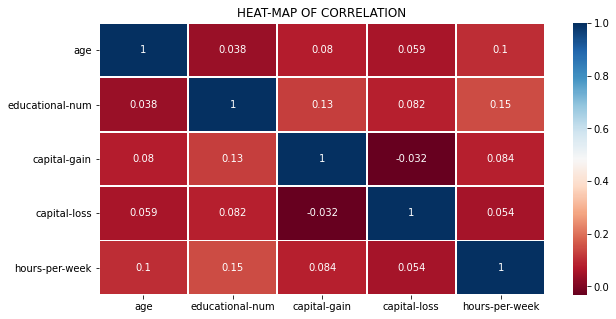

In [107]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,linewidths=0.8,cmap='RdBu')
plt.title("HEAT-MAP OF CORRELATION")

<b>OBSERVATION 4.3 : </b>
* Dark red color shows that both columns are highly negatively correlated to each other.
* Dark blues color shows that both variables are highly positive correlated to each other.
* In case of capital gain and capital loss they are negatively correlated to each other that means if capital-gain is high then capital-loss is low and vice versa.

<Figure size 1800x720 with 0 Axes>

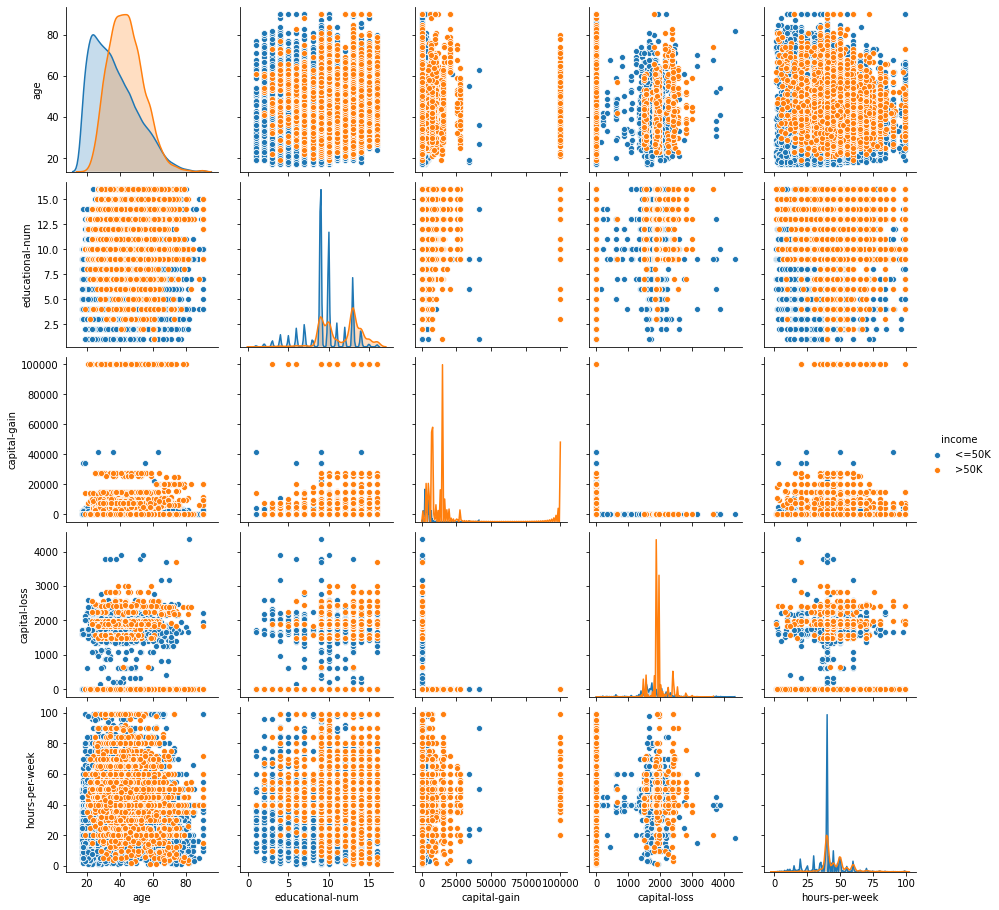

In [108]:
plt.figure(figsize=(25,10))
sns.pairplot(data=data,hue='income')

<b>OBSERVATION 4.4 :</b>
* we can observe that only age-age column makes the normal distributed gaussian distribution curve where kurtosis=0 i.e. a symmetric gaussian distribution where income>50K.
* we can see that there is very less variance between the data points in most of the plots.
* In the plot hours-per-week and age column data points are correlated each other.
* In educational-num  we can see the data is in discrete form.
* we can make this table as for diagonal plots of PDF :

| FEATURE   | KURTOSIS   |  
|---|---|
| age-age  | more than 80 years |  
| educational num-educational num  | more than 15.0  |   
| capital gain-capital gain | 100000  |  
| capital loss-capital loss| more than 4000 |
| hours per week-hours per week| 100 |
 


<Figure size 720x360 with 0 Axes>

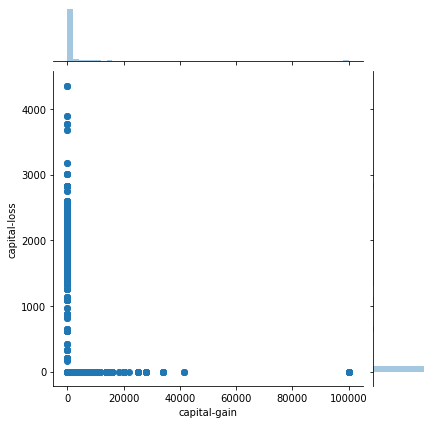

In [109]:
plt.figure(figsize=(10,5))
sns.jointplot(x='capital-gain', y='capital-loss',\
              data=df, kind='scatter')


<b>OBSERVATION 4.5 : </b>
* The scttered pattern of data points shows the negative correlation .
* the histogram of capital-gain is highly lef skewed.
* the histogram of capital-loss is highly right skewed.




<Figure size 720x360 with 0 Axes>

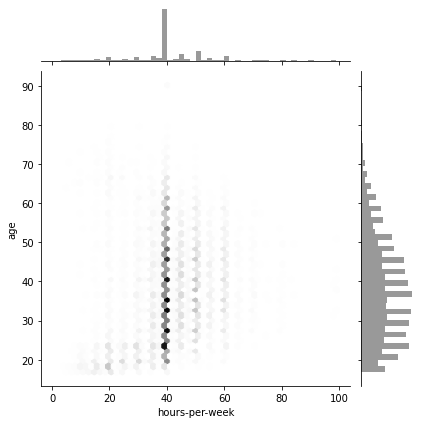

In [110]:
plt.figure(figsize=(10,5))
sns.jointplot(x =data['hours-per-week'], y = data['age'], kind = 'hex', color = 'k')

<b>OBSERVATION 4.6 : </b>
* we can see the clear density of 40 hours-per-week at age from 20-65 years.
* there are very less data points having high density working at almost 40 hours-per-week.

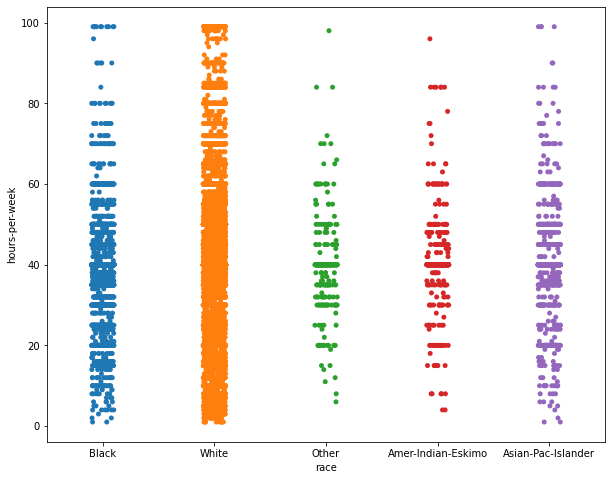

In [111]:
plt.figure(figsize=(10,8))
ax = sns.stripplot(x="race", y="hours-per-week", data=data)

<b>OBSERVATION 4.7 : </b>
* we can see the much overlapping of datapoints of white race as compare to other races i.e. clustering of data points occurs here.

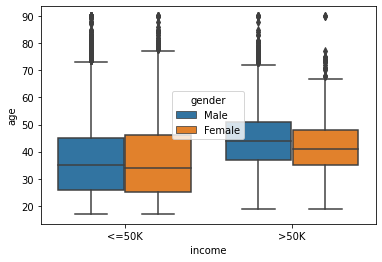

In [112]:
sns.boxplot(x="income", y="age", data=data,hue='gender')

<b>OBSERVATION 4.8 : </b>
* there are so many outliars in both income categories above the (Q1-1.5)
* the meadian of both male and female is almost similar for incme <=50K.

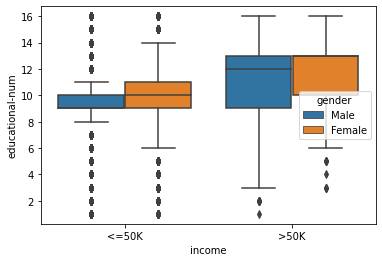

In [113]:
sns.boxplot(x="income", y="educational-num", data=data,hue='gender')

<b>OBSERVATION 4.9 : </b>
* we can see many outliars in both of the income category over 'educational-num'.
* In category <=50K, the 75 percentile of male is equal to the median of female.

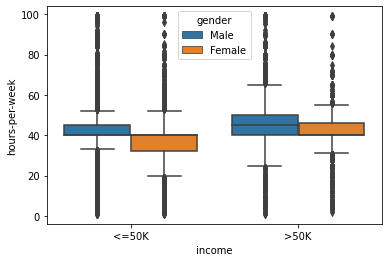

In [114]:
sns.boxplot(x="income", y="hours-per-week", data=data,hue='gender')

<b>OBSERVATION 4.10 : </b>
* In income<=50K , 25 percentile of male is equal 75 percentile of female on respective hour-per-week.
* there are so many outliars in both of the categories.
* In income >50k ,75 percentile is equal to meadian of male on respective hours-per-week.

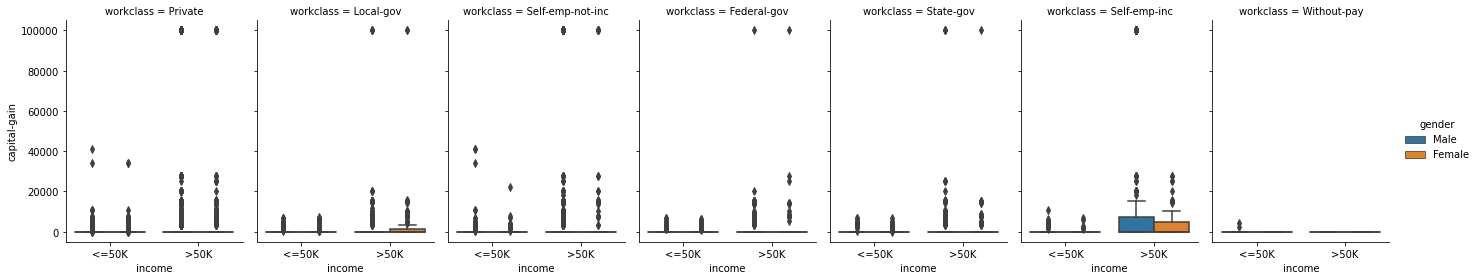

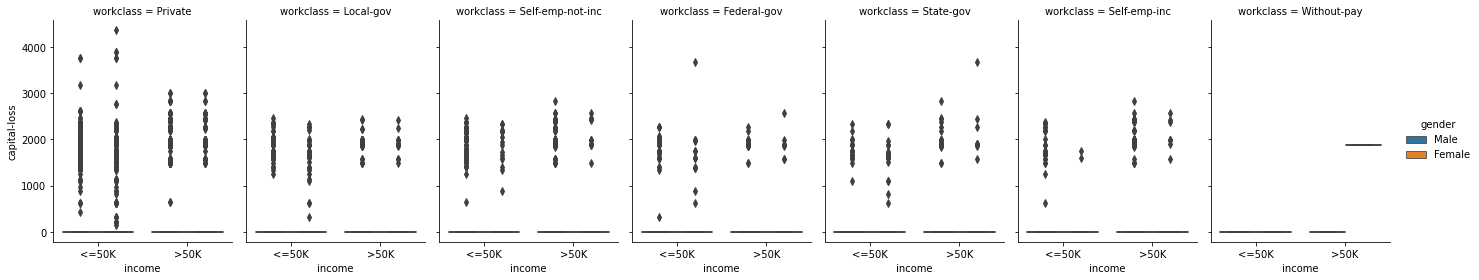

In [115]:
sns.catplot(x="income", y="capital-gain",
                hue="gender", col="workclass",
                data=data, kind="box",
                height=4, aspect=.7)
sns.catplot(x="income", y="capital-loss",
                hue="gender", col="workclass",
                data=data, kind="box",
                height=4, aspect=.7);

<b>OBSERVATION 4.11 : </b>
* In every workclass median of both the capital gain and capital-loss is almost equal to zero.
* all outliars lie above the (Q1-1.5).
* there is no outliars only in without pay workclass.

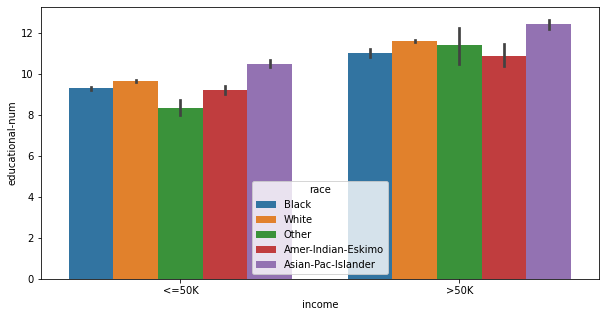

In [116]:
plt.figure(figsize=(10,5))
sns.barplot(x="income", y="educational-num", data=data,hue='race')

<b>OBSERVATION 4.12 : </b>
* we can see the that highly education num having the high income as >50K in any race.

##<b><u>5. CONCLUSION : </u></b>

####<b>We can conclude that :</b>
1. The **Adult Income Dataset** has total **48822** rows at initial level but as per handling missing values in form of '?' we removed the rows from the data set and number of rows became **45222** & columns became **14**.
2. The dataset contains certainset of missing values for categorical features, workclass,occupation, native-country.
3. We have seen that the percentage of lost rows are almost equal to the percentage of missing values present in the data set i.e. **7.36**.

4. Capital-gain and Capital loss are 2 features which are invversaly propotional to each other.

13. It seems that the features that impacts the income of a person are Capital Gain, Married-civ-spounce, Age and Hours per week.

14. The features that impact it most negatively are Never married, Own child, Priv-house-serv and Divorsed.

15. There is a **"Gender Inequality"** in that society.

16. If a person earns more than 50K, he is very likely to be a married man with large number of years of education

17. People who are never-married earn less than 50K.

19. The **United-States** is the native-country of most of the people.

20. capital-gain and capital-loss is almost equal for every feature.

21. We can clearly see the **"Race discrimination"** that time.(White skinned people get higher income and employment than others.)




##<b><u> 6.NORMALIZATION :</u></b>

* For numerical column we will use MinMaxScalar .
* For categorical column we will use get_dummies().

####<b>FOR NUMERICAL FEATURES --></b>

In [121]:
# Importing required library:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

df=data # initializing a new DF

# normalizing the numerical column :
min_max_scaler=preprocessing.MinMaxScaler()
numeric_col=['age','educational-num','capital-gain','capital-loss','hours-per-week']
df[numeric_col]=min_max_scaler.fit_transform(df[numeric_col]) 

# removing the column having object datatype :
object_col=[]
for x in df:
    if df[x].dtype == "object":
        object_col.append(x)
new_data=df.drop(object_col,axis=1)

new_data


,age,educational-num,capital-gain,capital-loss,hours-per-week
0,0.109589,0.400000,0.000000,0.0,0.397959
1,0.287671,0.533333,0.000000,0.0,0.500000
2,0.150685,0.733333,0.000000,0.0,0.397959
3,0.369863,0.600000,0.076881,0.0,0.397959
5,0.232877,0.333333,0.000000,0.0,0.295918
...,...,...,...,...,...
48837,0.136986,0.733333,0.000000,0.0,0.377551
48838,0.315068,0.533333,0.000000,0.0,0.397959
48839,0.561644,0.533333,0.000000,0.0,0.397959
48840,0.068493,0.533333,0.000000,0.0,0.193878


####<b>FOR CATEGORICAL FEATURES -->

In [0]:
# making dummy variables for each column having object data type

workclass_dummy=pd.get_dummies(df['workclass'])
education_dummy=pd.get_dummies(df['education'])
marital_dummy=pd.get_dummies(df['marital-status'])
occ_dummy=pd.get_dummies(df['occupation'])
relation_dummy=pd.get_dummies(df['relationship'])
race_dummy=pd.get_dummies(df['race'])
gender_dummy=pd.get_dummies(df['gender'])
native_dummy=pd.get_dummies(df['native-country'])
income_dummy=pd.get_dummies(df['income'])


In [124]:
# making a new dataframe and concatenate all the dummy columns to the existing dataframe: 
df_new=pd.concat((new_data,workclass_dummy,education_dummy,marital_dummy,occ_dummy,relation_dummy,race_dummy,gender_dummy,native_dummy,income_dummy),axis=1)

# removing the column :
df_new=df_new.drop(['Male','<=50K'],axis=1)

# renaming the existing column in DF :
df_new=df_new.rename(columns={"Female":"Gender"})
df_new=df_new.rename(columns={">50K":"Income"})

print("the number of rows in new DataFrame :",df.shape[0])
print("the number of columns in new DataFrame :",df.shape[1])
# print("the number of new dummy columns added in DataFrame :",col-data.shape[1 ])

df_new

the number of rows in new DataFrame : 45222
the number of columns in new DataFrame : 14


,age,educational-num,capital-gain,capital-loss,hours-per-week,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,...,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,Income
0,0.109589,0.400000,0.000000,0.0,0.397959,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.287671,0.533333,0.000000,0.0,0.500000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.150685,0.733333,0.000000,0.0,0.397959,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0.369863,0.600000,0.076881,0.0,0.397959,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
5,0.232877,0.333333,0.000000,0.0,0.295918,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.136986,0.733333,0.000000,0.0,0.377551,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
48838,0.315068,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
48839,0.561644,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
48840,0.068493,0.533333,0.000000,0.0,0.193878,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


<b>OBSERVATION :</b>
* In 2 categorical columns,there are 2 categories only as:
> 1. Gender = Male and Female
>2.Income = >50K and <=50K
* in order to decrease columns we will drop Male and <=50K column.
* after renaming the column now ,
>1. In Gender column ,
>> * 0 represents Male
>>*  1 represents Female.
>2. In Income column ,
>> * 0 represents <=50K
>>* 1 represnts >50K


---





##Resources :
* [ML_notes](https://github.com/bansalkanav/ML_notes)
* [Google](https://google.com)
* [Stackoverflow](https://stackoverflow.com/)